In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from pytorch_model_summary import summary

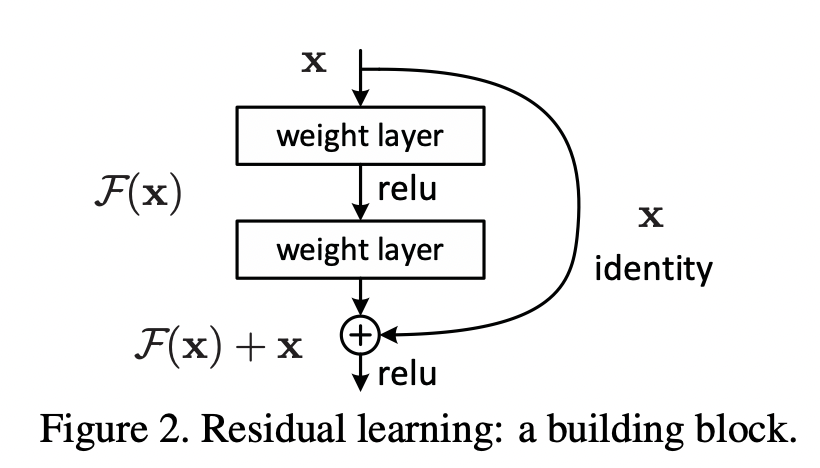

In [22]:
class BasicBlock(nn.Module):
    def __init__(self, in_channel, out_channel, stride):
        super(BasicBlock, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = in_channel, out_channels = out_channel, kernel_size=3, stride=stride, padding=1)
        self.conv2 = nn.Conv2d(in_channels = out_channel, out_channels = out_channel, kernel_size=3, stride=1, padding=1)

        self.bn1 = nn.BatchNorm2d(out_channel)
        self.bn2 = nn.BatchNorm2d(out_channel)

        self.identity = nn.Conv2d(in_channels=in_channel, out_channels=out_channel, kernel_size=1, stride=stride, padding=0)
        self.bn3 = nn.BatchNorm2d(out_channel)
        
    def forward(self, x):
        x_res = F.relu(self.bn1(self.conv1(x)))
        x_res = self.bn2(self.conv2(x_res))

        x_out = x_res + self.bn3(self.identity(x))
        x_out = F.relu(x_out)

        return x_out

In [23]:
model = BasicBlock(64, 128, 2)

In [24]:
print(summary(model, torch.randn(32, 64, 56, 56)))

-------------------------------------------------------------------------
      Layer (type)          Output Shape         Param #     Tr. Param #
          Conv2d-1     [32, 128, 28, 28]          73,856          73,856
     BatchNorm2d-2     [32, 128, 28, 28]             256             256
          Conv2d-3     [32, 128, 28, 28]         147,584         147,584
     BatchNorm2d-4     [32, 128, 28, 28]             256             256
          Conv2d-5     [32, 128, 28, 28]           8,320           8,320
     BatchNorm2d-6     [32, 128, 28, 28]             256             256
Total params: 230,528
Trainable params: 230,528
Non-trainable params: 0
-------------------------------------------------------------------------


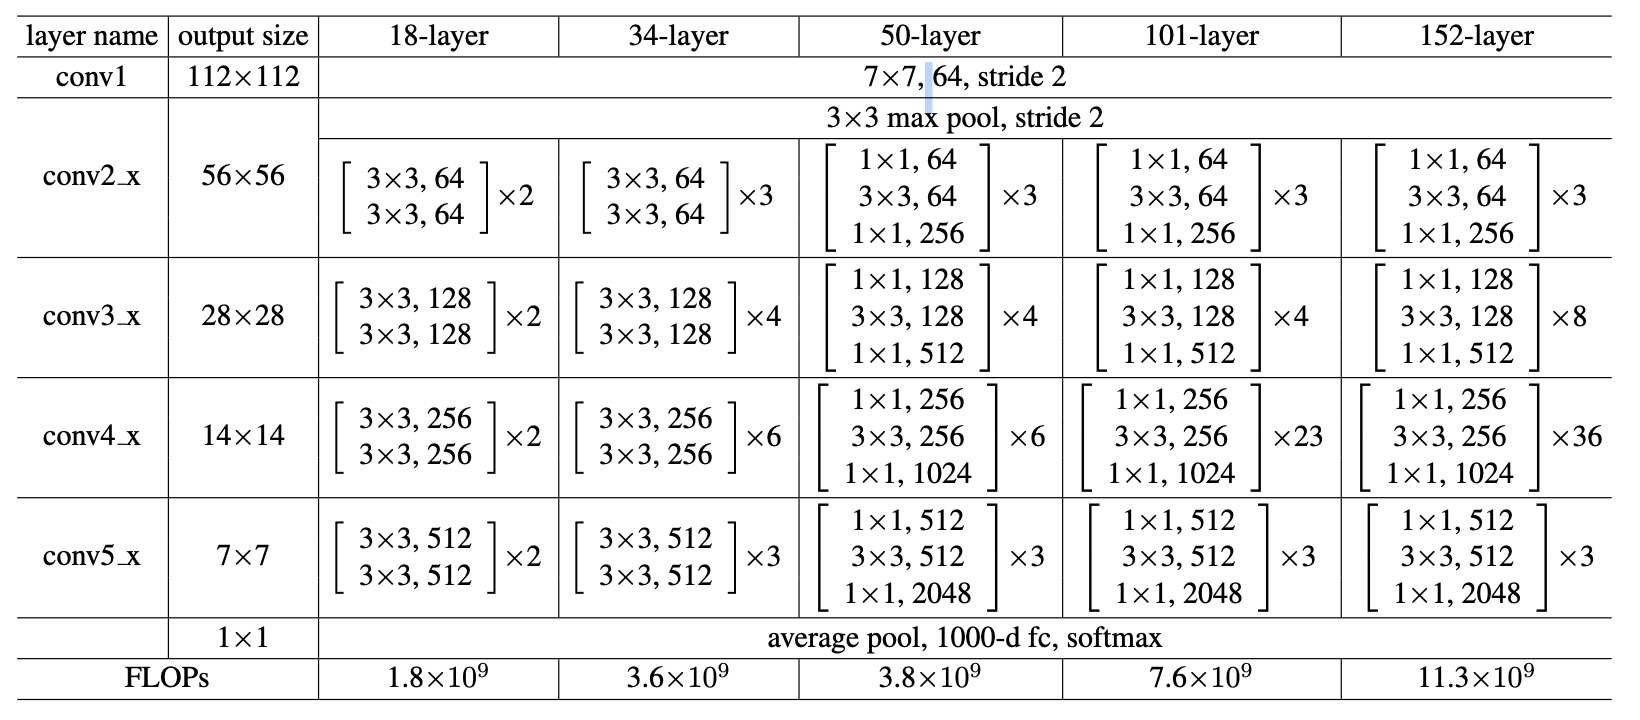

In [52]:
class ResNet18(nn.Module):
    def __init__(self):
        super(ResNet18, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)

        self.max_pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.block2 = self._make_layer(64, 64, 2, 1)
        self.block3 = self._make_layer(64, 128, 2, 2)
        self.block4 = self._make_layer(128, 256, 2, 2)
        self.block5 = self._make_layer(256, 512, 2, 2)

        self.avg_pool = nn.AvgPool2d(kernel_size=(7, 7))

        self.fc1 = nn.Linear(in_features=512, out_features=10)

    def _make_layer(self, in_channels, out_channels, num_block, stride):
        residual_block = []
        stride = [stride] + [1] * (num_block-1) # [2, 1]

        for stride_ in stride:
            residual_block.append(BasicBlock(in_channels, out_channels, stride_))
            in_channels = out_channels
        
        return nn.Sequential(*residual_block)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.max_pool(x)

        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.avg_pool(x)
        x = x.view(-1, 512)

        x = self.fc1(x)

        return x

In [53]:
model = ResNet18()

In [54]:
print(summary(model, torch.randn(32, 3, 224, 224)))

--------------------------------------------------------------------------
      Layer (type)           Output Shape         Param #     Tr. Param #
          Conv2d-1     [32, 64, 112, 112]           9,472           9,472
     BatchNorm2d-2     [32, 64, 112, 112]             128             128
       MaxPool2d-3       [32, 64, 56, 56]               0               0
      BasicBlock-4       [32, 64, 56, 56]          78,400          78,400
      BasicBlock-5       [32, 64, 56, 56]          78,400          78,400
      BasicBlock-6      [32, 128, 28, 28]         230,528         230,528
      BasicBlock-7      [32, 128, 28, 28]         312,448         312,448
      BasicBlock-8      [32, 256, 14, 14]         919,808         919,808
      BasicBlock-9      [32, 256, 14, 14]       1,247,488       1,247,488
     BasicBlock-10        [32, 512, 7, 7]       3,674,624       3,674,624
     BasicBlock-11        [32, 512, 7, 7]       4,985,344       4,985,344
      AvgPool2d-12        [32, 512, 1

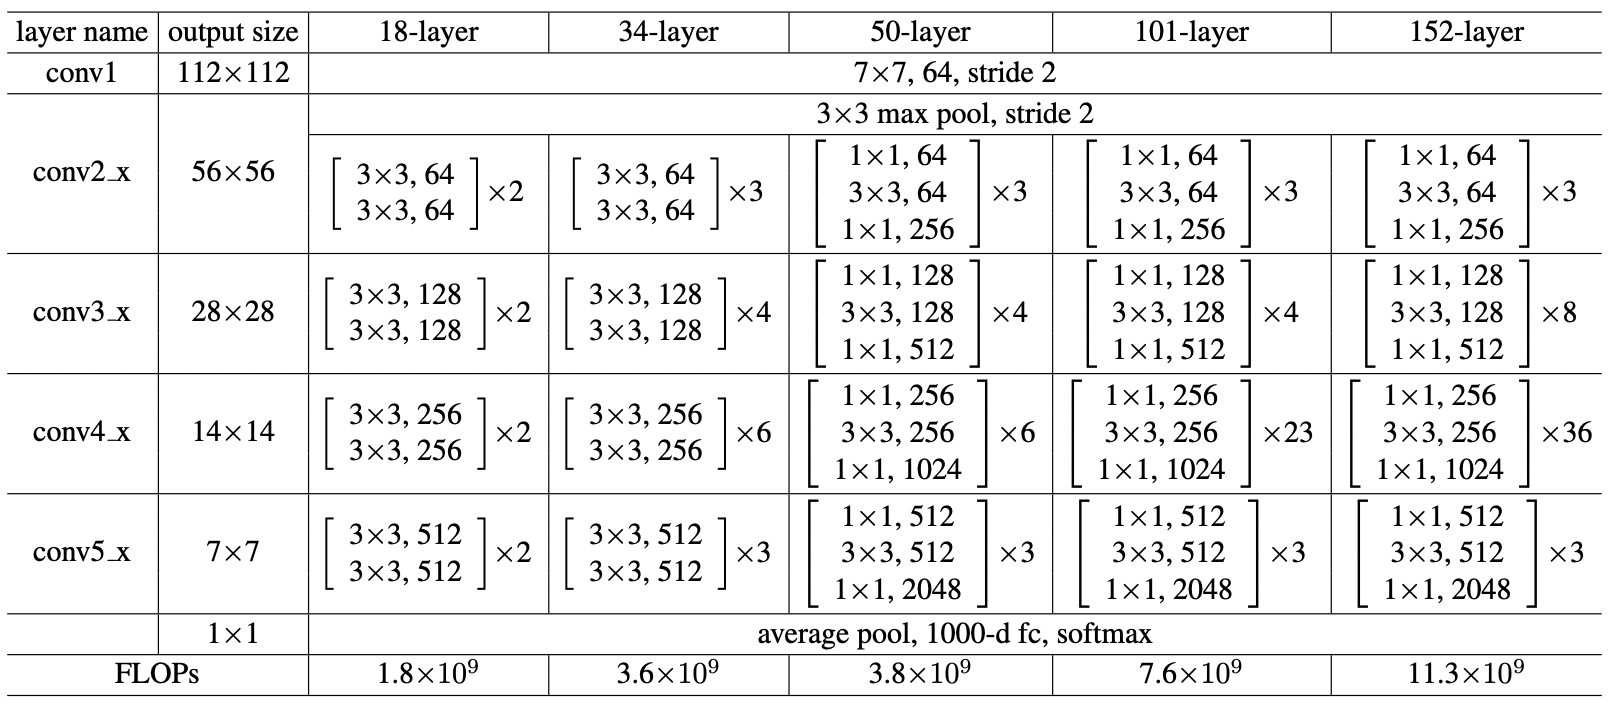

In [61]:
class ResNet34(nn.Module):
    def __init__(self):
        super(ResNet34, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.max_pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.block2 = self._make_layer(64, 64, 3, 1)
        self.block3 = self._make_layer(64, 128, 4, 2)
        self.block4 = self._make_layer(128, 256, 6, 2)
        self.block5 = self._make_layer(256, 512, 3, 2)

        self.avg_pool = nn.AvgPool2d(kernel_size=(7, 7))

        self.fc1 = nn.Linear(in_features=512, out_features=10)

    def _make_layer(self, in_channels, out_channels, num_block, stride):
        residual_block = []
        stride = [stride] + [1] * (num_block-1) # [2, 1]

        for stride_ in stride:
            residual_block.append(BasicBlock(in_channels, out_channels, stride_))
            in_channels = out_channels
        
        return nn.Sequential(*residual_block)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.max_pool(x)

        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.avg_pool(x)
        x = x.view(-1, 512)
        
        x = self.fc1(x)

        return x

In [62]:
model = ResNet34()

In [63]:
print(summary(model, torch.randn(32, 3, 224, 224)))

--------------------------------------------------------------------------
      Layer (type)           Output Shape         Param #     Tr. Param #
          Conv2d-1     [32, 64, 112, 112]           9,472           9,472
     BatchNorm2d-2     [32, 64, 112, 112]             128             128
       MaxPool2d-3       [32, 64, 56, 56]               0               0
      BasicBlock-4       [32, 64, 56, 56]          78,400          78,400
      BasicBlock-5       [32, 64, 56, 56]          78,400          78,400
      BasicBlock-6       [32, 64, 56, 56]          78,400          78,400
      BasicBlock-7      [32, 128, 28, 28]         230,528         230,528
      BasicBlock-8      [32, 128, 28, 28]         312,448         312,448
      BasicBlock-9      [32, 128, 28, 28]         312,448         312,448
     BasicBlock-10      [32, 128, 28, 28]         312,448         312,448
     BasicBlock-11      [32, 256, 14, 14]         919,808         919,808
     BasicBlock-12      [32, 256, 14,